In [13]:
import itertools as it

import dask
import dask.array as da
import numpy as np
import xarray as xr

## Function to rasterise

In [14]:
@dask.delayed
def tile_function(i, j, chunk_x, chunk_y):
    return np.ones((chunk_x, chunk_y)) * i * j

## Define chunks and number of tiles

In [15]:
chunk_x = 10
chunk_y = 20
n_chunks_x = 10
n_chunks_y = 10

## Run across tiles

In [16]:
delayed_arr = []
for i in range(n_chunks_x):
    delayed_arr_i = []
    for j in range(n_chunks_y):
        delayed_arr_i.append(da.from_delayed(tile_function(i, j, chunk_x, chunk_y), shape=(chunk_x, chunk_y), dtype=float))
    delayed_arr.append(delayed_arr_i)
arr = da.block(delayed_arr)
arr

dask.array<concatenate, shape=(100, 200), dtype=float64, chunksize=(10, 20), chunktype=numpy.ndarray>

In [17]:
xarr = xr.DataArray(arr, coords={"x": range(arr.shape[0]), "y": range(arr.shape[1])})
xarr

<xarray.DataArray 'concatenate-013e3afef2e5c0b9f391a7b8faea79a5' (x: 100, y: 200)>
dask.array<concatenate, shape=(100, 200), dtype=float64, chunksize=(10, 20), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197 198 199

In [18]:
xarr = xarr.compute()
xarr

<xarray.DataArray 'concatenate-013e3afef2e5c0b9f391a7b8faea79a5' (x: 100, y: 200)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 81., 81., 81.],
       [ 0.,  0.,  0., ..., 81., 81., 81.],
       [ 0.,  0.,  0., ..., 81., 81., 81.]])
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 191 192 193 194 195 196 197 198 199

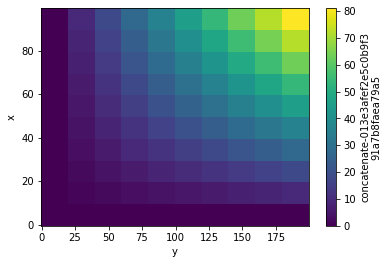

In [19]:
xarr.plot()

In [ ]:
list(it.product(range(10), range(20)))

In [ ]:
[da.from_delayed(tile_function(i, j), (10, 20), dtype=float)
    for i, j in it.product(range(10), range(20))]

## Orginal code - flat array not 2d tiled

In [ ]:
delayed_arr = [da.from_delayed(tile_function(i, j, chunk_x, chunk_y), shape=(chunk_x, chunk_y), dtype=float)
               for i, j in it.product(range(n_chunks_x), range(n_chunks_y))]
arr = da.concatenate(delayed_arr, axis=-1)
arr

In [ ]:
arr = da.concatenate([
    da.from_delayed(tile_function(i, j, chunk_x, chunk_y), shape=(chunk_x, chunk_y), dtype=float)
    for i, j in it.product(range(n_chunks_x), range(n_chunks_y))
], axis=-1)
arr